import statements

In [2]:
import polars as pl
import pandas as pd
import datetime as dt
import seaborn as sns

import data

In [3]:


import preprocessing.feature_engineering as fe

In [4]:
df_all = pl.read_parquet('./data/2022_data_selected.parquet')

In [5]:
fail_dict= fe.create_faildate_dict(df_all)

In [ ]:
#df_all.shape

In [ ]:
#df_faildates = df_all.filter(pl.col("failure") == 1)

In [ ]:
#df_faildates = df_faildates.to_pandas()

In [ ]:
#df_faildates

In [6]:
creation_date=fe.create_faildate(df_all,fail_dict)

In [7]:
classification_target = fe.create_target_classification(creation_date)
classification_target.head()

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,faildate,Time_till_failure,failing_in14days
date,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,date,duration[ms],i32
2022-03-11,"""ZLW18P9K""","""ST14000NM001G""",14000519643136,0,82,145176856,90,0,100,12,100,0,89,788618680,87,11590,100,0,100,12,100,0,100,0,100,2,99,2710,33,33,100,0,100,0,200,0,null,null,0
2022-03-11,"""ZLW0EGC7""","""ST12000NM001G""",12000138625024,0,82,151519352,99,0,100,1,100,0,83,178873441,84,14836,100,0,100,1,100,0,100,0,100,0,99,3909,48,48,100,0,100,0,200,0,null,null,0
2022-03-11,"""ZA1FLE1P""","""ST8000NM0055""",8001563222016,0,77,49979496,91,0,100,7,100,0,93,2115550504,84,14448,100,0,100,7,100,0,100,0,100,121,100,764,38,38,100,0,100,0,200,0,null,null,0
2022-03-11,"""ZA16NQJR""","""ST8000NM0055""",8001563222016,0,74,27873200,89,0,100,10,100,0,94,2634135447,52,42621,100,0,100,10,100,0,100,0,100,16,68,64822,34,34,100,0,100,0,200,0,null,null,0
2022-03-11,"""1050A084F97G""","""TOSHIBA MG07AC...",14000519643136,0,100,0,100,7770,100,3,100,0,100,0,81,7758,100,0,100,3,null,null,null,null,100,1,100,13,100,26,100,0,100,0,200,0,null,null,0


In [8]:
classification_target.shape

(80357762, 40)

In [9]:
classification_target['failing_in14days'].n_unique()

2

In [10]:
classification_target.columns

['date',
 'serial_number',
 'model',
 'capacity_bytes',
 'failure',
 'smart_1_normalized',
 'smart_1_raw',
 'smart_3_normalized',
 'smart_3_raw',
 'smart_4_normalized',
 'smart_4_raw',
 'smart_5_normalized',
 'smart_5_raw',
 'smart_7_normalized',
 'smart_7_raw',
 'smart_9_normalized',
 'smart_9_raw',
 'smart_10_normalized',
 'smart_10_raw',
 'smart_12_normalized',
 'smart_12_raw',
 'smart_187_normalized',
 'smart_187_raw',
 'smart_188_normalized',
 'smart_188_raw',
 'smart_192_normalized',
 'smart_192_raw',
 'smart_193_normalized',
 'smart_193_raw',
 'smart_194_normalized',
 'smart_194_raw',
 'smart_197_normalized',
 'smart_197_raw',
 'smart_198_normalized',
 'smart_198_raw',
 'smart_199_normalized',
 'smart_199_raw',
 'faildate',
 'Time_till_failure',
 'failing_in14days']

In [ ]:
#target_plot = classification_target.to_pandas()

In [ ]:
#grouping = classification_target.lazy().groupby("failing_in14days").agg(pl.mean(classification_target.columns[5:39]))

In [ ]:
#df_grouped = grouping.collect()

In [ ]:

#plt.figure(figsize=(15,8)) # specify figure size
#f1 = sns.countplot(x=df_grouped['failure']) # create countplot
#f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
#f1.set(xlabel=None) # set no label for x-axis 
#f1.set_ylabel("counts", fontsize = 10); # set label for y-axis
#f1.set_title('Imbalance data overview', fontsize=20); # set title

In [11]:
df_faildates_target1 = classification_target.filter(pl.col("failing_in14days") == 1)

In [12]:
df_faildates_target1.shape

(47657, 40)

In [13]:
target_0= 80357762-47657
target_0

80310105

In [14]:
target_1=47657

In [15]:
target_0=pd.DataFrame()

In [16]:
target_1=pd.DataFrame()

<AxesSubplot:>

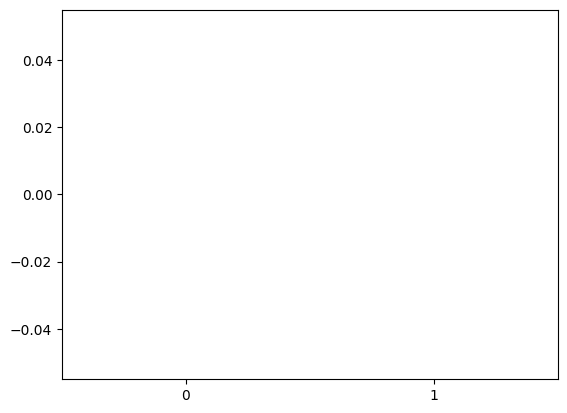

In [17]:
sns.barplot(data=[target_1,target_0] )

In [56]:
df_new = pd.DataFrame({'failures': [47657],

                   'no failure': [80310105]})

In [57]:
df_new

,failures,no failure
0,47657,80310105


<AxesSubplot:>

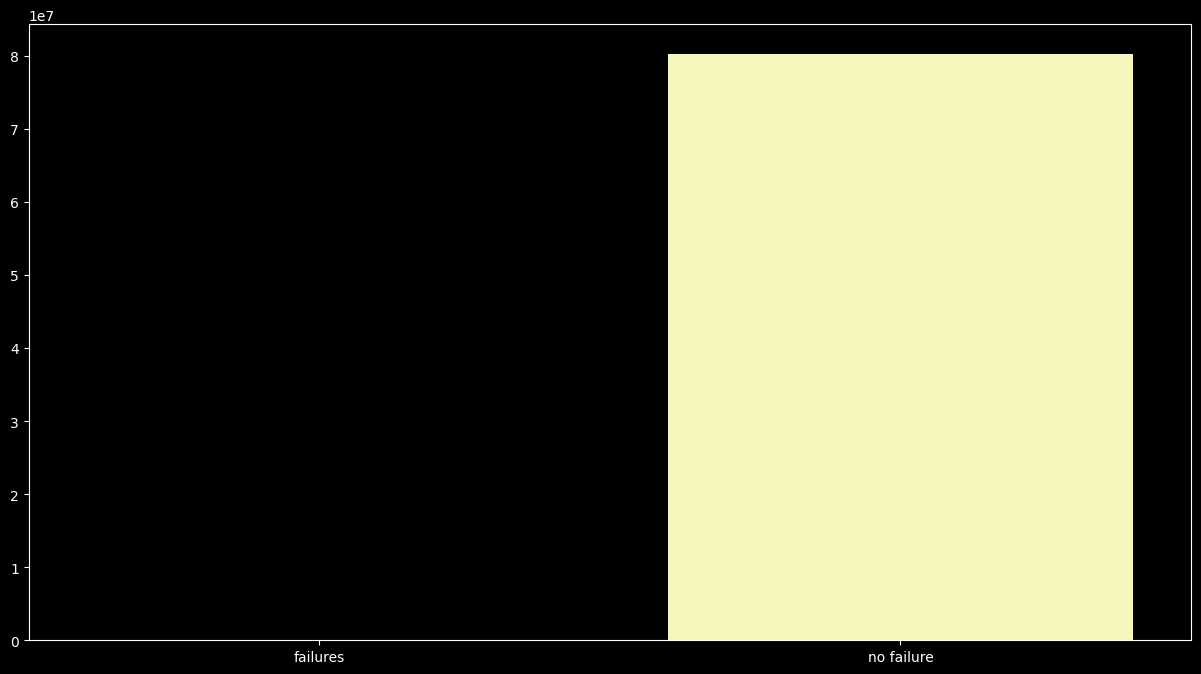

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.barplot(data=df_new )

In [59]:
df_new1 = pd.DataFrame({'0': [80310105,47657],

                   '1': [0,1]})

In [60]:
(80310105/80357762)*100

99.94069396805749

In [61]:
(47657/80357762)*100

0.05930603194250233

In [62]:
100-99.94069396805749

0.05930603194251205

In [63]:
df_new1

,0,1
0,80310105,0
1,47657,1


In [64]:
import matplotlib.pyplot as plt
import mplcyberpunk

In [65]:
cols = ['#4098fd' if (x < max(df_new1['0'])) else '#6eedda' for x in df_new1['0']]

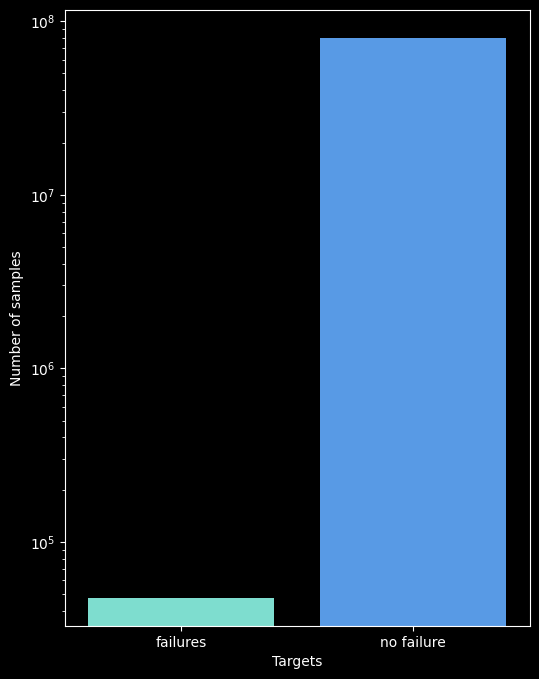

: 

In [70]:
#plt.style.use("cyberpunk")
plt.style.use('dark_background')
plt.figure(figsize=(6,8)) # specify figure size
f1 = sns.barplot(data=df_new, palette=cols) # create countplot
f1.grid(False)
#plt.bar(color=['black', 'red', 'green', 'blue', 'cyan'], x=[0,1])
#f1[0].set_color('red')
#f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("Number of samples", fontsize = 10); # set label for y-axis
f1.set_xlabel("Targets", fontsize = 10); # set label for y-axis
#f1.set_title('Imbalance data overview', fontsize=20); # set title
plt.yscale('log')
#plt.style.use(['dark_background', 'presentation']
#mplcyberpunk.add_glow_effects()


In [ ]:
#plt.figure(figsize=(15,8)) # specify figure size
#f1 = sns.countplot(x=df_grouped['failure']) # create countplot
#f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
#f1.set(xlabel=None) # set no label for x-axis 
#f1.set_ylabel("counts", fontsize = 10); # set label for y-axis
#f1.set_title('Imbalance data overview', fontsize=20); # set title

In [ ]:
#df_faildates_target0 = classification_target.filter(pl.col("failing_in14days") == 0)

In [ ]:
#df_failed_example = classification_target.filter(pl.col("serial_number") == "ZJV3BYAY")

In [ ]:
#df_failed_example 

In [ ]:
#target_savings=fe.search_faulty_drives(classification_target)

In [ ]:

#df_with_faildates = df_all.with_columns(pl.col("serial_number").map_dict(fail_dict).alias("faildate"))

In [ ]:
#df_with_faildates.shape

In [ ]:
#80357762 - 79781429

In [ ]:
#df_all = pl.read_csv('./data/2022_data_selected.parquet')